In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import joblib
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [4]:
df = pd.read_csv('survey.csv')

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [7]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [8]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [9]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [10]:
df.isna().any()

Timestamp                    False
Age                          False
Gender                       False
Country                      False
state                         True
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
comments                      True
dtype: bool

In [11]:
data = df.drop(columns=['state', 'comments', 'Timestamp', ])

In [12]:
import sklearn
from sklearn.impute import SimpleImputer
data['work_interfere'] = SimpleImputer(missing_values=np.NaN,strategy = 'most_frequent') \
                        .fit_transform(df['work_interfere'].values.reshape(-1,1))[:,0]

print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']


In [13]:
print(data['work_interfere'].value_counts())

Sometimes    729
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


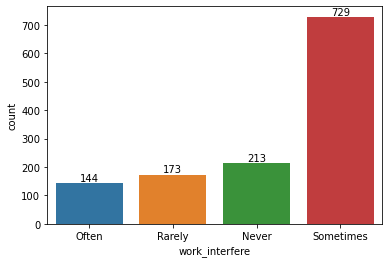

In [14]:
import seaborn as sns
ax = sns.countplot(data = data , x = 'work_interfere');
ax.bar_label(ax.containers[0]);

In [15]:
data['self_employed'] = SimpleImputer(missing_values=np.NaN,strategy = 'most_frequent') \
                        .fit_transform(df['self_employed'].values.reshape(-1,1))[:,0]
print(data['self_employed'].unique())

['No' 'Yes']


In [16]:
print(data['self_employed'].value_counts())

No     1113
Yes     146
Name: self_employed, dtype: int64


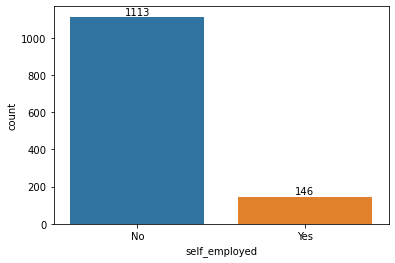

In [17]:
import seaborn as sns
ax = sns.countplot(data = data , x = 'self_employed');
ax.bar_label(ax.containers[0]);

In [18]:
data['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [19]:
organise_gender = {
    'Male ': 'Male',
    'male': 'Male',
    'M': 'Male',
    'm': 'Male',
    'Male': 'Male',
    'Cis Male': 'Male',
    'Man': 'Male',
    'cis male': 'Male',
    'Mail': 'Male',
    'Male-ish': 'Male',
    'Male (CIS)': 'Male',
    'Cis Man': 'Male',
    'msle': 'Male',
    'Malr': 'Male',
    'Mal': 'Male',
    'maile': 'Male',
    'Make': 'Male',
    'Female ': 'Female',
    'female': 'Female',
    'F': 'Female',
    'f': 'Female',
    'Woman': 'Female',
    'Female': 'Female',
    'femail': 'Female',
    'Cis Female': 'Female',
    'cis-female/femme': 'Female',
    'Femake': 'Female',
    'Female (cis)': 'Female',
    'woman': 'Female',
    'Female (trans)': 'Other',
    'queer/she/they': 'Other',
    'non-binary': 'Other',
    'fluid': 'Other',
    'queer': 'Other',
    'Androgyne': 'Other',
    'Trans-female': 'Other',
    'male leaning androgynous': 'Other',
    'Agender': 'Other',
    'A little about you': 'Other',
    'Nah': 'Other',
    'All': 'Other',
    'ostensibly male, unsure what that really means': 'Other',
    'Genderqueer': 'Other',
    'Enby': 'Other',
    'p': 'Other',
    'Neuter': 'Other',
    'something kinda male?': 'Other',
    'Guy (-ish) ^_^': 'Other',
    'Trans woman': 'Other'
}

data['Gender'].replace(organise_gender, inplace=True)
print('%s%s' % (df["Gender"].nunique(), ' Data Record' ))
print(data['Gender'].unique())

49 Data Record
['Female' 'Male' 'Other']


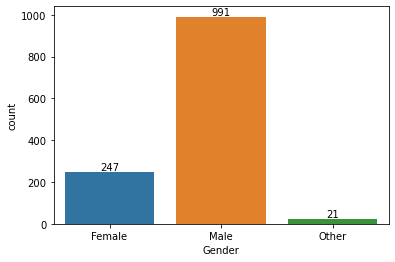

In [20]:
ax = sns.countplot(data=data, x='Gender');
ax.bar_label(ax.containers[0]);

In [21]:
data = data[(data['Age'] >= 17) & (data['Age'] <= 99)]
print('%s%s' %(data["Age"].nunique(),' Data Record'))
print(data['Age'].unique())

45 Data Record
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


<Figure size 720x432 with 0 Axes>

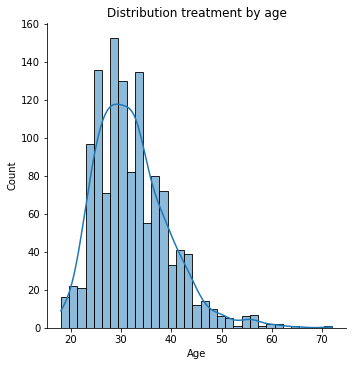

In [22]:
plt.figure(figsize=(10, 6));
sns.displot(data['Age'], kde = 'treatment');
plt.title('Distribution treatment by age');

In [23]:
total_duplicate_rows_a = data.duplicated().sum()
print(total_duplicate_rows_a)

4


In [24]:
data.drop_duplicates(inplace=True)
total_duplicates = data.duplicated().sum()
print(total_duplicates)

0


In [25]:
top_country_Treat = data[data['treatment'] == 'Yes'].groupby(by=['Country'], as_index=False) \
                                              .agg(Total_Treatment = ('treatment', 'count')) \
                                              .sort_values(['Total_Treatment'], ascending=False) \
                                              .head(10)
top_country_NoTreat = data[data['treatment'] == 'No'].groupby(by=['Country'], as_index=False) \
                                              .agg(Total_NoTreatment = ('treatment', 'count')) \
                                              .sort_values(['Total_NoTreatment'], ascending=False) \
                                              .head(10)
top_country_Ratio=top_country_Treat.merge(top_country_NoTreat,left_on='Country',right_on='Country')

top_country_Ratio

,Country,Total_Treatment,Total_NoTreatment
0,United States,408,338
1,United Kingdom,91,92
2,Canada,37,35
3,Germany,21,24
4,Ireland,13,14
5,Australia,13,8
6,Netherlands,9,17


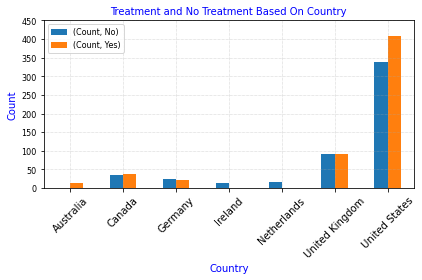

In [26]:
group_by_0=data.groupby(by=['Country','treatment']).agg(Count=('treatment','count')).sort_values(by='Count',ascending=False).reset_index()
group_by_1=group_by_0.head(11)
group_by_2=group_by_1.set_index(['Country','treatment'],drop=True).unstack('treatment')
group_by_2


group_by_2.plot(kind='bar',stacked=False)



plt.title('Treatment and No Treatment Based On Country',fontsize=10,loc='center',color='blue')
plt.legend(loc='upper left',fontsize=8)
plt.xlabel('Country',fontsize=10,color='blue')
plt.ylabel('Count',fontsize=10,color='blue')
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels,location=plt.yticks(fontsize=8)
plt.yticks(labels,(labels).astype(int),minor=False)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [27]:
us = data.loc[df['Country'] == 'United States']
us

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,Male,United States,No,Yes,No,Sometimes,6-25,No,Yes,...,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,Female,United States,No,Yes,Yes,Sometimes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,36,Male,United States,No,Yes,No,Rarely,More than 1000,No,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,Female,United States,No,No,No,Sometimes,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


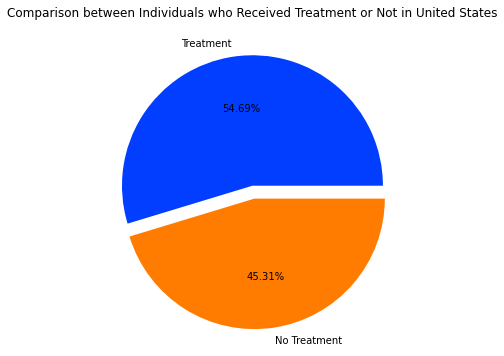

In [28]:
data_pie=us.loc[df['Country'] == 'United States', 'treatment'].value_counts()
keys=['Treatment','No Treatment']

palette_color = sns.color_palette('bright')

explode = [0, 0.1]

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(data_pie, labels=keys, colors=palette_color, explode=explode, autopct='%.2f%%')
plt.title('Comparison between Individuals who Received Treatment or Not in United States')
plt.show()

In [29]:
supporting_facilities = us.groupby(by=['Country', 'benefits'], as_index=False) \
                          .agg(TotalBenefits=('benefits', 'count')) \
                          .sort_values(['TotalBenefits'], ascending=False)

print(supporting_facilities)

         Country    benefits  TotalBenefits
2  United States         Yes            395
0  United States  Don't know            235
1  United States          No            116


In [31]:
us.groupby(by='no_employees')['treatment'].value_counts()

no_employees    treatment
1-5             Yes           45
                No            29
100-500         Yes           65
                No            47
26-100          Yes          100
                No            70
500-1000        Yes           22
                No            20
6-25            Yes           68
                No            65
More than 1000  Yes          108
                No           107
Name: treatment, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


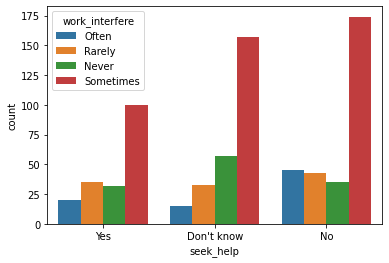

In [32]:
print(sns.countplot(x='seek_help',data=us,hue='work_interfere'))

In [33]:
sh_values = us.seek_help.value_counts().sort_values(ascending=False).to_frame()
sh_values = sh_values.rename(columns={'Seek Help': 'count'})
sh_values

,seek_help
No,297
Don't know,262
Yes,187


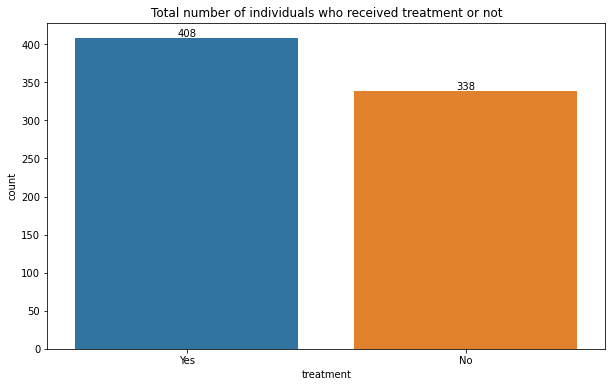

In [34]:
plt.figure(figsize = (10,6));
treat = sns.countplot(data = us,  x = 'treatment');
treat.bar_label(treat.containers[0]);
plt.title('Total number of individuals who received treatment or not');

In [35]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in (1,4,6,10,11,13,14,15):
    us.iloc[:,i] = enc.fit_transform(us.iloc[:,i])
us.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,United States,No,0,Yes,1,6-25,No,Yes,...,2,2,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,1,United States,No,0,No,2,More than 1000,No,No,...,0,0,Maybe,No,No,No,No,No,Don't know,No
4,31,1,United States,No,0,No,0,100-500,Yes,Yes,...,0,0,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,33,1,United States,No,1,No,3,6-25,No,Yes,...,0,0,No,No,Yes,Yes,No,Maybe,Don't know,No
6,35,0,United States,No,1,Yes,3,1-5,Yes,Yes,...,1,1,Maybe,Maybe,Some of them,No,No,No,Don't know,No


Text(0.5, 1.0, 'family_history')

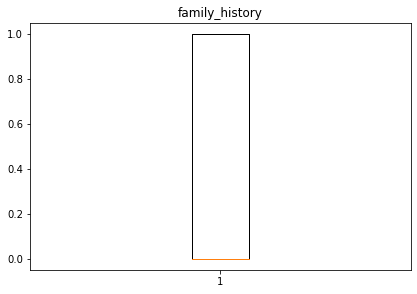

In [61]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(us['Age'])
ax.set_title('Age')


{'whiskers': [<matplotlib.lines.Line2D at 0x229b2d4d520>,
 'caps': [<matplotlib.lines.Line2D at 0x229b2d4deb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x229b2d4d910>],
 'medians': [<matplotlib.lines.Line2D at 0x229b2d04670>],
 'fliers': [<matplotlib.lines.Line2D at 0x229b2d04be0>],
 'means': []}

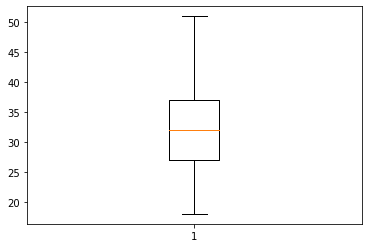

In [37]:
Q1 = us['Age'].quantile(0.25)
Q3 = us['Age'].quantile(0.75)
IQR = Q3 - Q1

filter = (us['Age'] >= Q1 - 1.5 * IQR) & (us['Age']<= Q3+ 1.5*IQR)
usa= us.loc[filter]
plt.boxplot(usa['Age'])

In [38]:
usa.corr().T

,Age,Gender,family_history,work_interfere,benefits,care_options,seek_help,anonymity,leave
Age,1.000000,0.098776,-0.022125,-0.042621,0.151633,0.102365,0.141559,0.041900,0.018767
Gender,0.098776,1.000000,-0.096622,-0.051474,-0.064277,-0.035432,-0.003560,-0.015971,0.000568
family_history,-0.022125,-0.096622,1.000000,0.125410,0.102134,0.065594,0.039335,0.038399,0.041950
work_interfere,-0.042621,-0.051474,0.125410,1.000000,-0.034348,-0.029167,0.006584,0.013409,-0.040673
benefits,0.151633,-0.064277,0.102134,-0.034348,1.000000,0.440809,0.398621,0.353076,0.115879
care_options,0.102365,-0.035432,0.065594,-0.029167,0.440809,1.000000,0.304325,0.358885,0.197782
seek_help,0.141559,-0.003560,0.039335,0.006584,0.398621,0.304325,1.000000,0.361148,0.196416
anonymity,0.041900,-0.015971,0.038399,0.013409,0.353076,0.358885,0.361148,1.000000,0.279199
leave,0.018767,0.000568,0.041950,-0.040673,0.115879,0.197782,0.196416,0.279199,1.000000


<AxesSubplot:>

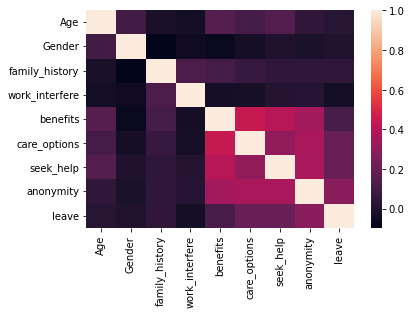

In [39]:
sns.heatmap(usa.corr())

In [60]:
from sklearn.model_selection import train_test_split
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere','seek_help']
X = usa[feature_cols]
y = usa.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'seek_help']


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=12)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12)

In [43]:
pred_rf_test = rf.predict(X_test)

In [44]:
print(classification_report(y_test,pred_rf_test))
print("Accuracy Score : ",accuracy_score(y_test,pred_rf_test))

              precision    recall  f1-score   support

          No       0.74      0.77      0.75       104
         Yes       0.78      0.76      0.77       115

    accuracy                           0.76       219
   macro avg       0.76      0.76      0.76       219
weighted avg       0.76      0.76      0.76       219

Accuracy Score :  0.7625570776255708


In [45]:
confusion_matrix(y_test,pred_rf_test)

array([[80, 24],
       [28, 87]], dtype=int64)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
y_predict_rf = best_rf_model.predict(X_test)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [47]:
from sklearn.metrics import classification_report

# Use the best Random Forest model to make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_predict_rf)

print("Classification Report:\n", report)
accuracy_rf = accuracy_score(y_test, y_predict_rf)

print("Accuracy Score:", accuracy_rf)


Classification Report:
               precision    recall  f1-score   support

          No       0.77      0.76      0.76       104
         Yes       0.78      0.79      0.79       115

    accuracy                           0.78       219
   macro avg       0.78      0.78      0.78       219
weighted avg       0.78      0.78      0.78       219

Accuracy Score: 0.776255707762557


In [48]:
confusion_matrix(y_test,y_predict_rf)

array([[79, 25],
       [24, 91]], dtype=int64)

In [49]:
adb = AdaBoostClassifier()
adb.fit(X_train, y_train)
pred_adb_train = adb.predict(X_train)
pred_adb_test = adb.predict(X_test)

In [50]:
print(classification_report(y_test,pred_adb_test))
print("Accuracy Score : ",accuracy_score(y_test,pred_adb_test))

              precision    recall  f1-score   support

          No       0.80      0.77      0.78       104
         Yes       0.80      0.83      0.81       115

    accuracy                           0.80       219
   macro avg       0.80      0.80      0.80       219
weighted avg       0.80      0.80      0.80       219

Accuracy Score :  0.7990867579908676


In [51]:
confusion_matrix(y_test,pred_adb_test)

array([[80, 24],
       [20, 95]], dtype=int64)

In [52]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 1.0],  
   
}

In [53]:
grid_search = GridSearchCV(estimator=adb, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [54]:
best_ada_clf = AdaBoostClassifier(n_estimators=best_params['n_estimators'],
                                  learning_rate=best_params['learning_rate'])
best_ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1)

In [55]:
y_predict_ada = best_ada_clf.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_predict_ada)
print("Accuracy:", accuracy_ada)


Accuracy: 0.8036529680365296


In [56]:
from sklearn.metrics import classification_report

# Use the best Random Forest model to make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_predict_ada)

print("Classification Report:\n", report)
accuracy_ada = accuracy_score(y_test, y_predict_ada)

print("Accuracy Score:", accuracy_ada)


Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.76      0.79       104
         Yes       0.80      0.84      0.82       115

    accuracy                           0.80       219
   macro avg       0.80      0.80      0.80       219
weighted avg       0.80      0.80      0.80       219

Accuracy Score: 0.8036529680365296


In [57]:
confusion_matrix(y_test,y_predict_ada)

array([[79, 25],
       [18, 97]], dtype=int64)

In [58]:
import pickle
file = open('random_forest.pkl','wb')

pic_data=pickle.dump(rf,file)


In [59]:
import pickle
file = open('adaboost.pkl','wb')

data2=pickle.dump(best_ada_clf,file)
